# Практическое задание

Валанкин Юрий Михайлович, 154 группа

### Задача Bike Sharing

Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодных условиях необходимо спрогнозировтаь спрос на прокат велосипедов.

В исходной псотановке задачи доступно 9 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

### Анализ и визуализация данных

In [68]:
from sklearn import cross_validation, ensemble, grid_search, linear_model, metrics, pipeline, preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import xgboost as xgb

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('bike_sharing_train.csv')

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [6]:
type(data)

pandas.core.frame.DataFrame

3 . Проанализируйте описание данных:

***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***count*** - number of total rentals

datetime + season, workingday,temp, windspeed, count

In [9]:
data.datetime = data.datetime.apply(pd.to_datetime)
data['month'] = data.datetime.apply(lambda d: d.month)
data['hour'] = data.datetime.apply(lambda d: d.hour)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,4


In [8]:
matplotlib.style.use('ggplot')

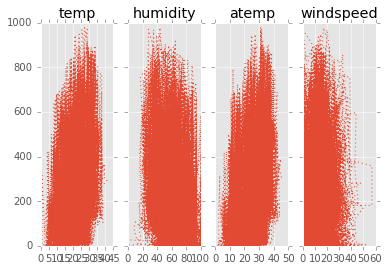

In [9]:
#fig = plt.figure()
#plt.xlabel('feature')
#plt.ylabel('count')
#plt.grid(True)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
ax1.plot(data['temp'].values,data['count'].values,':')
ax2.plot(data['humidity'].values,data['count'].values,':')
ax3.plot(data['atemp'].values,data['count'].values,':')
ax4.plot(data['windspeed'].values,data['count'].values,':')

ax1.set_title('temp')
ax2.set_title('humidity')
ax3.set_title('atemp')
ax4.set_title('windspeed')

plt.figure(figsize=(7, 7)) 
#plt.plot(data['temp'].values,data['count'].values,'.')
#plt.legend(['count'])
#plt.subplot(data['temp'].values,data['count'].values,'.')
#plt.savefig('foo.png')
f.savefig('foo.png',dpi=400)
#plt.show()


In [75]:
d.values

array([1, 1, 1, ..., 4, 4, 4])

NameError: name 'date' is not defined

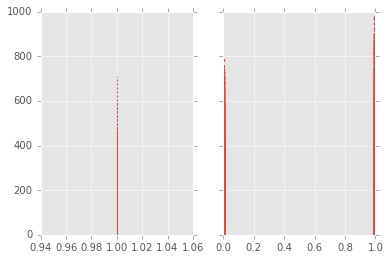

In [76]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
l = data.copy()[data['holiday'] == 1]
ax1.plot(l['holiday'].values, l['count'].values,':')
ax2.plot(data['workingday'].values,data['count'].values,'.')
ax3.plot(date,data['count'].values,'.')


ax1.set_title('holiday')
ax2.set_title('workingday')


#plt.plot(data['temp'].values,data['count'].values,'.')
#plt.legend(['count'])
#plt.subplot(data['temp'].values,data['count'].values,'.')
#plt.savefig('foo.png')
f.savefig('foo1.png',dpi=400)
#plt.show()

In [10]:
date = [x.split('-')[0] for x in data.copy()['datetime'].values]
print date[:10]
#use to_datetime instead

AttributeError: 'numpy.datetime64' object has no attribute 'split'

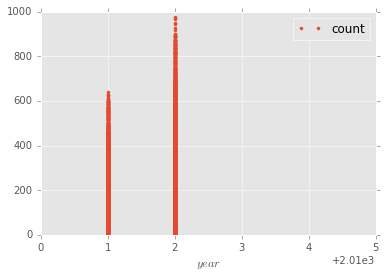

In [78]:
fig = plt.figure()
plt.xlabel('$year$')
plt.grid(True)
plt.xlim([2010,2015])
plt.plot(date, data['count'].values,'.')
plt.legend(['count'])
plt.show()

In [79]:
time = [x.split()[1].split(':')[0] for x in data.copy()['datetime'].values]


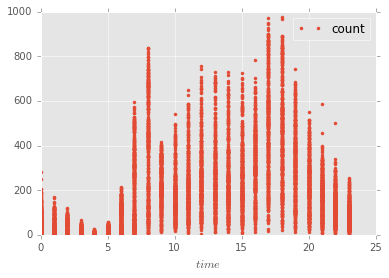

In [80]:
plt.xlabel('$time$')
plt.grid(True)
plt.plot(time, data['count'].values,'.')
plt.legend(['count'])
plt.show()

Прокат пользовался большим спросом,в 2012 году, в рабочие дни.

In [81]:
data.copy().drop('datetime',1).drop('count',1).corrwith(data.copy()['count'])

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
dtype: float64

больше всего коррелируют температура и влажность

In [82]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


Больше всего коррелируют temp-atemp, humidity-weather, count-weather, temp-count

In [83]:
means = pd.DataFrame()
deviations = pd.DataFrame()
stds = pd.DataFrame()
for index in list(data.copy().drop('datetime',1).columns.values):
    means[index] = pd.Series(np.mean((data[index].values)))
    deviations[index] = pd.Series(np.var((data[index].values)))
    stds[index] = pd.Series(np.std((data[index].values)))


#holiday 	workingday 	weather 	temp 	atemp 	humidity 	windspeed 	count

In [84]:
print means,'\n',deviations,'\n',stds


     season   holiday  workingday   weather      temp      atemp  humidity  \
0  2.506614  0.028569    0.680875  1.418427  20.23086  23.655084  61.88646   

   windspeed       count  
0  12.799395  191.574132   
     season   holiday  workingday   weather       temp      atemp    humidity  \
0  1.245731  0.027753    0.217284  0.401714  60.703296  71.812258  370.337283   

   windspeed         count  
0  66.653546  32810.298886   
     season   holiday  workingday   weather      temp     atemp   humidity  \
0  1.116123  0.166591    0.466138  0.633809  7.791232  8.474211  19.244149   

   windspeed       count  
0   8.164162  181.136134  


### Линейные модели

In [12]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,4


In [13]:
data_nodate = data.copy().drop('datetime',1)
n = 9100
train = data_nodate[:n]
test = data_nodate[n:]
X_train = train.copy().drop('count',1).values
X_test = test.copy().drop('count',1).values
Y_train = train.copy()['count'].values
Y_test = test.copy()['count'].values

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train,Y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
sgd_regressor = linear_model.SGDRegressor()
lasso = linear_model.Lasso()

Y_sgd_train = sgd_regressor.fit(X_train,Y_train)
Y_lasso_train = lasso.fit(X_train,Y_train)

Y_sgd_predicted =  sgd_regressor.predict(X_test)
Y_lasso_predicted = lasso.predict(X_test)


In [16]:
sgd_mae_train =  Y_sgd_train.score(X_train,Y_train)
lasso_mae_train =  Y_lasso_train.score(X_train,Y_train)

sgd_mae_test =  metrics.mean_absolute_error(Y_test,Y_sgd_predicted)
lasso_mae_test =  metrics.mean_absolute_error(Y_test,Y_lasso_predicted)

print "Test errors:", sgd_mae_test, lasso_mae_test
print "train errors:", sgd_mae_train, lasso_mae_train

Test errors: 139.009769326 139.33517024
train errors: 0.357763123694 0.358365385372


In [17]:
print sgd_regressor.coef_
print lasso.coef_

[-11.62921223  -4.91072469   0.8773403   -2.78285175  38.27700361
  28.99387363 -38.81412864   3.96869413  14.66783453  47.74482486]
[ -0.          -0.79943544  -0.          -1.92686294  45.14797407
  18.08954683 -37.772883     0.10512338   3.43525496  48.20286619]


Больше всего внесли вклад temp, atemp, humidity

$T_d = T - 0.2(100-RH)$ - Приближенное значение температуры точки россы при задатой относительной влажности и температуры
Определим wind_type (штиль,...,ураган) в соответствии со шкалой Бофорта. В описании контеста сказано : "...bike rental demand in the Capital Bikeshare program in Washington, D.C.", поэтому будем считать, что скорость ветра в миллях в час, С = 1,60934.

In [18]:
data_extended = data.copy().drop('datetime',1)
data_extended['TD'] = pd.Series(data['temp'] - 0.2*(100 - data['humidity']))
def wind_classes(speed):
    if 0 <= speed < 1: return 1
    elif 1 <= speed < 4: return 2
    elif 4 <= speed < 7: return 3
    elif 7 <= speed < 12: return 4
    elif 12 <= speed < 18: return 5
    elif 18 <= speed < 24: return 6
    elif 24 <= speed < 31: return 7
    elif 31 <= speed < 38: return 8
    elif 38 <= speed < 46: return 9
    elif 46 <= speed < 54: return 10
    elif 54 <= speed < 63: return 11
    elif 63 <= speed < 72: return 12
    elif  speed >= 72: return 13

    
data_extended['wind_types'] = pd.Series(data_extended['windspeed'].map(wind_classes))

In [19]:
train = data_extended[:n]
test = data_extended[n:]
X_train = train.copy().drop('count',1).values
X_test = test.copy().drop('count',1).values
Y_train = train.copy()['count'].values
Y_test = test.copy()['count'].values

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

sgd_regressor = linear_model.SGDRegressor(random_state = 435)

Y_sgd_train = sgd_regressor.fit(X_train,Y_train)

Y_sgd_predicted =  sgd_regressor.predict(X_test)

sgd_mae_train =  Y_sgd_train.score(X_train,Y_train)

sgd_mae_test =  metrics.mean_absolute_error(Y_test,Y_sgd_predicted)

print "Test error:", sgd_mae_test
print "Train error:", sgd_mae_train


Test error: 135.557843249
Train error: 0.358173235455


In [118]:
def wind_classes(speed):
    if 0 <= speed < 1: return 1
    elif 1 <= speed < 4: return 2
    elif 4 <= speed < 7: return 3
    elif 7 <= speed < 12: return 4
    elif 12 <= speed < 18: return 5
    elif 18 <= speed < 24: return 6
    elif 24 <= speed < 31: return 7
    elif 31 <= speed < 38: return 8
    elif 38 <= speed < 46: return 9
    elif 46 <= speed < 54: return 10
    elif 54 <= speed < 63: return 11
    elif 63 <= speed < 72: return 12
    elif  speed >= 72: return 13

In [119]:
# Пример:
data = pd.read_csv('bike_sharing_train.csv',header=0)
data.datetime = data.datetime.apply(pd.to_datetime)
data['month'] = data.datetime.apply(lambda d: d.month)
data['hour'] = data.datetime.apply(lambda d: d.hour)

data['TD'] = pd.Series(data['temp'] - 0.2*(100 - data['humidity']))
data['wind_types'] = pd.Series(data_extended['windspeed'].map(wind_classes))

data.head()
train = data.iloc[:-1000]
test = data.iloc[-1000:]

train_labels = train['count'].values
test_labels = test['count'].values

train_data = train.drop(['datetime','count'],axis = 1)
test_data = test.drop(['datetime','count'],axis = 1)

print data.shape, train.shape, test.shape

(10886, 14) (9886, 14) (1000, 14)


In [21]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,4


In [120]:
# Создание индекса для бинарных признаков
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

# Создание индекса для вещественных признаков
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed','hour','TD']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

categorical_data_columns = ['season', 'weather','month','wind_types']
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)

# Создание модели регресии
model = linear_model.SGDRegressor(random_state = 0,loss='squared_loss',penalty='l2')

# Объявление pipline -  цепочки преобразования данных, начиная от обработки данных в зависимости от их типа, и 
# заканчивая обучением модели. 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean=0.0,with_std=1.0))            
                        ])),
            #categirical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('scaling', preprocessing.OneHotEncoder(handle_unknown='ignore'))            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)

In [121]:
# С цепочкой можно работать как с одиночным преобразованием, в частности вызывать методы fit и predict 
estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))


118.84861267644163

никак?  или незначительно

In [24]:
estimator.get_params().keys()

['feature_processing__binary_variables_processing__pass_y',
 'feature_processing__binary_variables_processing__func',
 'model_fitting__learning_rate',
 'feature_processing__n_jobs',
 'feature_processing__numeric_variables_processing__selecting',
 'feature_processing__numeric_variables_processing__scaling__with_std',
 'feature_processing__categorical_variables_processing__selecting__pass_y',
 'feature_processing__transformer_weights',
 'feature_processing__categorical_variables_processing__scaling__categorical_features',
 'model_fitting__fit_intercept',
 'feature_processing__numeric_variables_processing__steps',
 'feature_processing__categorical_variables_processing__scaling__handle_unknown',
 'feature_processing__categorical_variables_processing__scaling__n_values',
 'feature_processing',
 'model_fitting__l1_ratio',
 'feature_processing__categorical_variables_processing__scaling__sparse',
 'feature_processing__categorical_variables_processing__selecting__validate',
 'feature_processing

In [25]:
grid_params = {
   # 'model_fitting__loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'model_fitting__penalty' : ['l1', 'l2','elasticnet'],
    'model_fitting__n_iter' : range(5,15),
    'model_fitting__alpha' : np.linspace(0.0001, 0.001, num = 15),
    'model_fitting__eta0' : np.linspace(0.001, 0.1, num = 5),

}

In [26]:
#cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 0)


In [27]:
randomized_grid = grid_search.RandomizedSearchCV(estimator, grid_params, scoring = 'mean_absolute_error',n_iter = 20)

In [28]:
randomized_grid.fit(train_data, train_labels)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x7fb37fe6ecf8>, pass_y=False,
          validate=True)), ('numeric_variables_processing', Pipeline(steps=[('sel...r=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, verbose=0, warm_start=False))]),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'model_fitting__penalty': ['l1', 'l2', 'elasticnet'], 'model_fitting__alpha': array([ 0.0001 ,  0.00016,  0.00023,  0.00029,  0.00036,  0.00042,
        0.00049,  0.00055,  0.00061,  0.00068,  0.00074,  0.00081,
        0.00087,  0.00094,  0.001  ]), 'model_fitting__eta0': array([ 0.001  ,  0.02575,  0.0505 ,  0.07525,  0.1    ]), 'model_fitting__n_iter': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
          pre_dispatch='2*n_jobs'

In [29]:
print randomized_grid.best_score_
print randomized_grid.best_params_

-114.552179807
{'model_fitting__penalty': 'l2', 'model_fitting__alpha': 0.001, 'model_fitting__eta0': 0.075250000000000011, 'model_fitting__n_iter': 8}


In [30]:
metrics.mean_absolute_error(test_labels, randomized_grid.best_estimator_.predict(test_data))


118.11714861902746

несильно

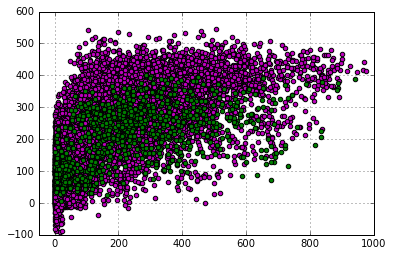

In [38]:
fig = plt.figure()
plt.grid(True)
plt.scatter(train_labels,randomized_grid.best_estimator_.predict(train_data),c='m')
plt.scatter(test_labels,randomized_grid.best_estimator_.predict(test_data),c='g')

plt.ylim(-100,600)
plt.xlim(-50,1000)

plt.show()

Сложно сказать, скорее всего не совсем правильную

### Случайный лес

In [122]:
# Создание модели регресии
model = ensemble.RandomForestRegressor(random_state=0,max_depth=20,n_estimators=50)

# Объявление pipline -  цепочки преобразования данных, начиная от обработки данных в зависимости от их типа, и 
# заканчивая обучением модели. 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean=0.0,with_std=1.0))            
                        ])),
            #categirical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('scaling', preprocessing.OneHotEncoder(handle_unknown='ignore'))            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)
ef = estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

79.472354039763985

In [123]:
ef.score(train_data, train_labels)

0.97744810464913334

In [124]:
labeldummy, forest = estimator.steps[-1]
importances = forest.feature_importances_

In [125]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

X = X_train
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.592252)
2. feature 2 (0.136738)
3. feature 1 (0.056645)
4. feature 4 (0.050554)
5. feature 3 (0.036777)
6. feature 7 (0.032547)
7. feature 5 (0.020777)
8. feature 14 (0.011802)
9. feature 25 (0.005570)
10. feature 12 (0.005422)
11. feature 8 (0.004056)
12. feature 24 (0.003977)


Примерно соответствует представлениям, но казалось, что влажность ~ температуре

In [65]:
test_predict = estimator.predict(test_data)
train_predict = estimator.predict(train_data)

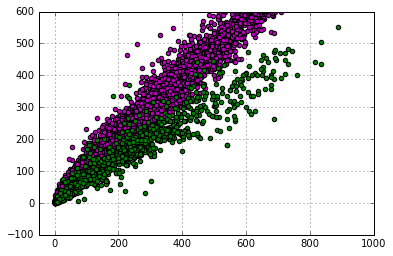

In [103]:
fig = plt.figure()
plt.grid(True)
plt.scatter(train_labels,train_predict,c='m')
plt.scatter(test_labels,test_predict,c='g')

plt.ylim(-100,600)
plt.xlim(-50,1000)

plt.show()

Видно, что лес гораздо лучше подходит.

### Опциональная часть

Попробуйте улучшить результат, полученный на предыдущих шагах. В этом разделе можно и нужно пользоваться любыми изученными алгоритмами, инструментами и всем, чем вам захочется.

In [130]:
model = xgb.XGBRegressor(learning_rate =0.1, 
                         n_estimators=140, 
                         max_depth=5,
                         min_child_weight=1, 
                         gamma=0, 
                         subsample=0.8, 
                         colsample_bytree=0.8,
                         nthread=4, 
                         scale_pos_weight=1, 
                         seed=27)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean=0.0,with_std=1.0))            
                        ])),
            #categirical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('scaling', preprocessing.OneHotEncoder(handle_unknown='ignore'))            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)
ef = estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

79.514722205430274

In [131]:
estimator.get_params().keys()

['feature_processing__binary_variables_processing__pass_y',
 'feature_processing__binary_variables_processing__func',
 'model_fitting__silent',
 'model_fitting__learning_rate',
 'feature_processing__n_jobs',
 'feature_processing__numeric_variables_processing__selecting',
 'model_fitting__colsample_bylevel',
 'model_fitting__reg_lambda',
 'feature_processing__numeric_variables_processing__scaling__with_std',
 'feature_processing__categorical_variables_processing__selecting__pass_y',
 'feature_processing__transformer_weights',
 'feature_processing__categorical_variables_processing__scaling__categorical_features',
 'model_fitting__gamma',
 'model_fitting__n_estimators',
 'model_fitting__scale_pos_weight',
 'feature_processing__numeric_variables_processing__steps',
 'feature_processing__categorical_variables_processing__scaling__handle_unknown',
 'feature_processing__categorical_variables_processing__scaling__n_values',
 'feature_processing',
 'model_fitting__objective',
 'feature_processi

In [135]:
params = {
        'model_fitting__min_child_weight': [1],
        'model_fitting__subsample': [0.8],
        'model_fitting__max_depth': np.linspace(1, 10, 20),
        'model_fitting__learning_rate': [0.05],
        }

In [136]:
 
gsearch = grid_search.GridSearchCV(estimator,params,n_jobs=1,cv=2)

In [137]:

gsearch.fit(train_data, train_labels)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x7fb385343320>, pass_y=False,
          validate=True)), ('numeric_variables_processing', Pipeline(steps=[('sel...inear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'model_fitting__min_child_weight': [1], 'model_fitting__max_depth': array([  1.     ,   1.47368,   1.94737,   2.42105,   2.89474,   3.36842,
         3.84211,   4.31579,   4.78947,   5.26316,   5.73684,   6.21053,
         6.68421,   7.15789,   7.63158,   8.10526,   8.57895,   9.05263,
         9.52632,  10.     ]), 'model_fitting__learning_rate': [0.05], 'model_fitting__subsample': [0.8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [139]:
print gsearch.best_score_
print gsearch.best_params_

0.495027371352
{'model_fitting__min_child_weight': 1, 'model_fitting__max_depth': 5.2631578947368416, 'model_fitting__learning_rate': 0.05, 'model_fitting__subsample': 0.8}


In [106]:
test_predict = estimator.predict(test_data)
train_predict = estimator.predict(train_data)

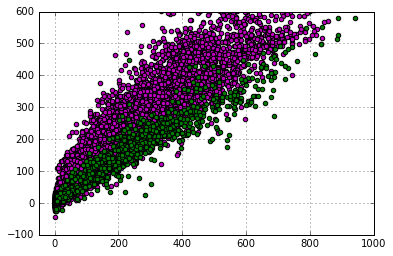

In [138]:
fig = plt.figure()
plt.grid(True)
plt.scatter(train_labels,gsearch.best_estimator_.predict(train_data),c='m')
plt.scatter(test_labels,gsearch.best_estimator_.predict(test_data),c='g')

plt.ylim(-100,600)
plt.xlim(-50,1000)

plt.show()

### Заключение

В этом разделе Вы можете написать, какие выводы Вы сделали в процессе работы над заданием, понравилось ли оно Вам, а также всё, что Вы о задании думаете =)

Прикольно,годнота